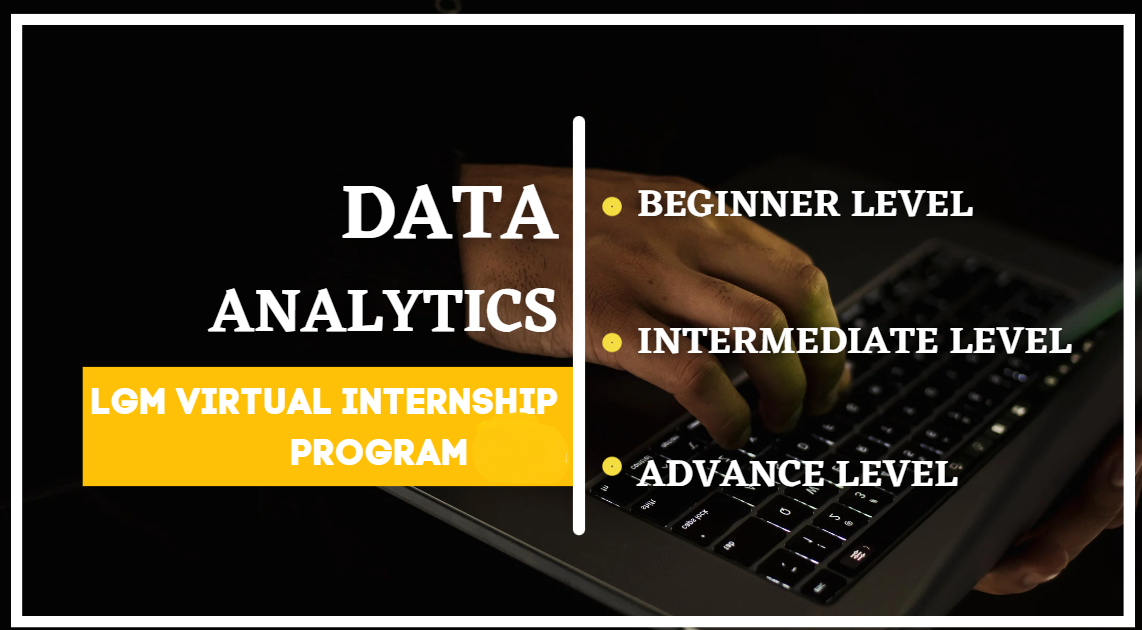


##**TASK-1 Iris Flowers Classification ML Project :**

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

NAME: G.HARINISRI


IMPORT THE REQUIRED PACKAGES AND LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from  tensorflow.keras.optimizers import SGD

IMPORTING THE IRIS DATASET

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv',
                names=["Sepal_Length_in_cm","Sepal_Width_in_cm","Petal_Length_in_cm","Petal_Width_in_cm","Species_Flower"])

REMOVING UNNCESSARY COLUMNS

In [ ]:
df = df.drop("Id")

In [ ]:
df

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


PERFORMING EDA

In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sepal_Length_in_cm  150 non-null    object
 1   Sepal_Width_in_cm   150 non-null    object
 2   Petal_Length_in_cm  150 non-null    object
 3   Petal_Width_in_cm   150 non-null    object
 4   Species_Flower      150 non-null    object
dtypes: object(5)
memory usage: 7.0+ KB


In [ ]:
df.isnull().sum()

Sepal_Length_in_cm    0
Sepal_Width_in_cm     0
Petal_Length_in_cm    0
Petal_Width_in_cm     0
Species_Flower        0
dtype: int64

In [ ]:
df.describe()

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
count,150,150,150,150,150
unique,35,23,43,22,3
top,5.0,3.0,1.5,0.2,Iris-setosa
freq,10,26,14,28,50


DATA VISUALIZATION

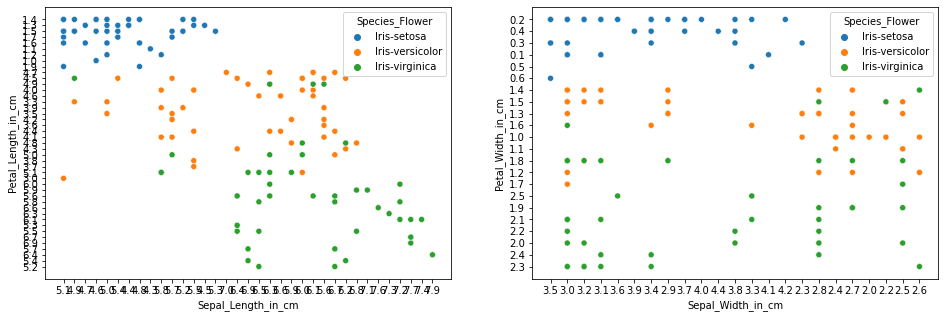

In [ ]:
#scatterplot
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='Sepal_Length_in_cm',y='Petal_Length_in_cm',data=df,hue='Species_Flower',ax=ax1)
sns.scatterplot(x='Sepal_Width_in_cm',y='Petal_Width_in_cm',data=df,hue='Species_Flower',ax=ax2)

SPLITTING THE DATASET

In [ ]:
x = df[['Sepal_Length_in_cm', 'Sepal_Width_in_cm', 'Petal_Length_in_cm', 'Petal_Width_in_cm']]
y = df['Species_Flower']
df1 = x

TRANSFORMING THE DATASET

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
data_x = scaler.fit_transform(x.values)
df2 = pd.DataFrame(data_x, index = x.index, columns = x.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.values, y, test_size = 0.2, random_state=42)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [ ]:
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 3)
y_test = to_categorical(y_test, num_classes = 3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


BUILDING MODEL

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=4))
model.add(Dense(3, activation='softmax'))
sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


PRINTING HISTORY FOR EPOCHS = 300

In [ ]:
history = model.fit(X_train, y_train, epochs = 300, batch_size = 32)

Epoch 1/300
4/4 [==============================] - 2s 6ms/step - loss: 1.1633 - accuracy: 0.2167
Epoch 2/300
4/4 [==============================] - 0s 5ms/step - loss: 0.9829 - accuracy: 0.5583
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 0.7900 - accuracy: 0.7417
Epoch 4/300
4/4 [==============================] - 0s 5ms/step - loss: 0.6417 - accuracy: 0.8083
Epoch 5/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5494 - accuracy: 0.8167
Epoch 6/300
4/4 [==============================] - 0s 5ms/step - loss: 0.4903 - accuracy: 0.8167
Epoch 7/300
4/4 [==============================] - 0s 7ms/step - loss: 0.4503 - accuracy: 0.8250
Epoch 8/300
4/4 [==============================] - 0s 12ms/step - loss: 0.4203 - accuracy: 0.8250
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 0.3994 - accuracy: 0.8333
Epoch 10/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3787 - accuracy: 0.8333
Epoch 11/300
4/4 [==========

PRINTING THE SCORE

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)

In [ ]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.03163070231676102
Test accuracy: 1.0


CONFUSION MATRIX

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


#**THANK YOU!!**